In [ ]:
import numpy as np
import matplotlib.pyplot as plt


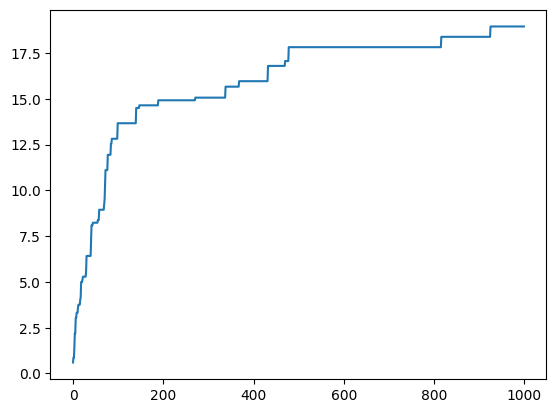

In [ ]:

class arms:
  def __init__(self):
    self.K=10
    self.arm_means = np.random.random(self.K)
    self.best_arm_mean = max(self.arm_means)
    self.best_arm = np.argmax(self.arm_means)
    self.alpha_beta = np.ones((self.K,2))

def thompson_sampling(A,n=1000):
  regret =np.zeros(n)

  for t in range(n):
    sample = np.random.beta(A.alpha_beta[:,0],A.alpha_beta[:,1])
    max_sample_arm = np.argmax(sample)
    max_sample = max(sample)
    x= np.random.binomial(1,A.arm_means[max_sample_arm])

    A.alpha_beta[max_sample_arm][0]+=x
    A.alpha_beta[max_sample_arm][1]+=(1-x)

    if t==0:
      regret[t] = A.best_arm_mean - A.arm_means[max_sample_arm]
    else:
      regret[t] = regret[t-1]+ (A.best_arm_mean - A.arm_means[max_sample_arm])

  return regret

A=arms()
plt.plot(thompson_sampling(A))

[[ 0.19875462 -0.6929752  -0.69302379]
 [-0.75832733  0.62835728  0.17351309]
 [ 0.29605604 -0.68213629  0.66861117]
 [ 0.61259355 -0.53007401 -0.58630256]
 [-0.84866655 -0.52474866  0.06636214]
 [-0.27616336 -0.84718065  0.45389288]
 [-0.82483012 -0.47556848 -0.30576117]
 [-0.10548068  0.6847381  -0.72111549]
 [ 0.0307381   0.19956166 -0.97940304]
 [ 0.19337459 -0.59242504 -0.78207342]]
2.511619540572012


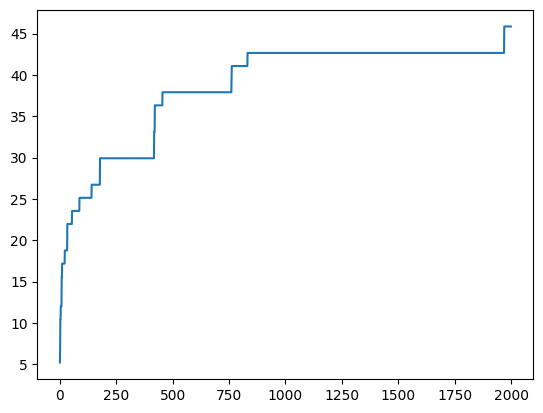

In [ ]:

class linear_bandits:
  def __init__(self):
    self.K=10
    self.d=3
    self.optimal = np.random.uniform(-3,3,self.d)
    a=np.random.uniform(-3,3,(self.K,self.d))
    self.arms = (a.T/np.linalg.norm(a,axis=1)) .T
    print(self.arms)
    self.best_arm = np.argmax(self.arms@self.optimal)
    self.best_arm_reward = self.arms[self.best_arm] @ self.optimal
    print(self.best_arm_reward)

np.random.seed(42)

def compute_reward(arm,optimal):
  return (np.dot(arm,optimal)+np.random.normal(0,1))

A = linear_bandits()
def linUCB(A,n=2000):
  regret=0
  reward=0
  regret_list=[]
  reward_list=[]
  delta = 0.0001
  gamma= 0.001
  b= np.zeros(A.d)
  V = gamma* np.eye(A.d)
  theta_hat = np.zeros(A.d)

  for t in range(n):
    confidence = gamma**0.5 + (2* np.log(1/delta) + A.d* np.log(1+ (t/(gamma*A.d))))**0.5
    ucb = A.arms@ theta_hat + confidence*np.diag((A.arms @ np.linalg.inv(V) @ A.arms.T))**0.5
    chosen_arm = np.argmax(ucb)
    reward= compute_reward(A.arms[chosen_arm],A.optimal)
    regret+= A.best_arm_reward -  (A.arms[chosen_arm] @ A.optimal)
    reward_list.append(reward)
    regret_list.append(regret)

    V+= np.outer( A.arms[chosen_arm], A.arms[chosen_arm])
    b+= reward* A.arms[chosen_arm]
    theta_hat = np.linalg.inv(V)@b

  # print((A.arms @ np.linalg.inv(V) @ A.arms.T))

  # print(theta_hat)

  return regret_list

plt.plot(linUCB(A))

In [ ]:
chosen_arm=3
A.arms[chosen_arm]@A.optimal

-2.7107189725189755

In [ ]:
compute_reward(A.arms[chosen_arm],A.optimal)

-2.375480285449027